## Основы языка Python для аналитиков (семинары)
### Урок 3. Изменение таблиц в Pandas
*** разбор домашнего задания Условие 1: Задача 1***
1.2 Создать новый признак delta_renovated, который будет содержать разницу в годах между годом реновацией дома и годом постройки дома
Если реновации дома не было, то в новом признаке поставьте 0
1.3 Создайте признаки года продажи, месяца продажи
1.4 Удалите признаки date, zipcode, lat, long

In [141]:
import pandas as pd

In [142]:
df = pd.read_csv('data\kc_house_data.csv')
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [143]:
df['delta_renovated'] = df['yr_renovated'] - df['yr_built']
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,delta_renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,-1955
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,40


In [144]:
df['delta_renovated'] = df['delta_renovated'].apply(lambda x: x if x > 0 else 0)
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,delta_renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,40


In [145]:
df['year'] = df['date'].apply(lambda x: int(x[:4]))
df['month'] = df['date'].apply(lambda x: int(x[4:6]))
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,delta_renovated,year,month
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,0,2014,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,40,2014,12


In [146]:
df.drop(columns=['date', 'zipcode', 'lat', 'long'], inplace = True)
df.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year,month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,1340,5650,0,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,1690,7639,40,2014,12


*** разбор домашнего задания Условие 2: 2 задача***
Создайте датафрейм с клиентами:
clients = pd.DataFrame({
'client_id': [1459, 4684, 3498, 3942, 4535, 2308, 2866, 2765, 1472, 4236, 2295,
939, 3840, 280, 20, 4332, 3475, 4213, 3113, 4809, 2134, 2242,
2068, 4929, 1384, 1589, 3317, 2260, 1727, 1764, 1611, 1474],
'house_id': [8965450190, 6823100225, 5104540330, 2131701075, 1522700060,
1189000207, 6821600300, 7137950720, 9510920050, 6131600255,
5428000070, 1788800910, 8100400160, 3123049142, 6306800010,
5083000375, 7920100025, 1951600150, 809001400, 339600110,
1622049154, 1099600250, 8563000110, 2768100205, 3995700435,
8861700030, 3303980210, 7731100066, 8146100580, 825069097,
3889100029, 9524100196]
})
2.1 Присоедините к таблице clients данные по домам через метод join
2.2 Присоедините к таблице clients данные по домам через метод merge
Это нужно, чтобы понимать, какие дома покупались клиентами
house_id - это индексы датафрейма с домами

In [147]:
clients = pd.DataFrame({
'client_id': [1459, 4684, 3498, 3942, 4535, 2308, 2866, 2765, 1472, 4236, 2295,
939, 3840, 280, 20, 4332, 3475, 4213, 3113, 4809, 2134, 2242,
2068, 4929, 1384, 1589, 3317, 2260, 1727, 1764, 1611, 1474],
'house_id': [8965450190, 6823100225, 5104540330, 2131701075, 1522700060,
1189000207, 6821600300, 7137950720, 9510920050, 6131600255,
5428000070, 1788800910, 8100400160, 3123049142, 6306800010,
5083000375, 7920100025, 1951600150, 809001400, 339600110,
1622049154, 1099600250, 8563000110, 2768100205, 3995700435,
8861700030, 3303980210, 7731100066, 8146100580, 825069097,
3889100029, 9524100196]
})

In [148]:
clients_house_id = clients.set_index('house_id')
clients_house_id.head(2)

,client_id
house_id,
8965450190,1459
6823100225,4684


In [149]:
df_idx = df.set_index('id')
df_idx.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year,month
id,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,1340,5650,0,2014,10
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,1690,7639,40,2014,12


In [150]:
joined = clients_house_id.join(df_idx)
joined.head(2)

,client_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year,month
339600110,4809,395000.0,3,2.5,1610,3755,2.0,0,0,3,7,1610.0,0,1987,0,1300,3823,0,2014,9
809001400,3113,925000.0,3,1.0,1630,3200,1.5,0,0,4,8,1630.0,0,1912,0,1710,3600,0,2014,9


In [151]:
merged = clients.merge(df,left_on='house_id', right_on = 'id')
merged.head()

,client_id,house_id,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year,month
0,1459,8965450190,8965450190,295000.0,3,2.50,1500,3060,2.0,0,...,7,1500.0,0,1994,0,2700,7734,0,2015,2
1,4684,6823100225,6823100225,700000.0,4,1.75,1870,6000,1.0,0,...,8,1670.0,200,1949,0,1710,6000,0,2015,4
2,3498,5104540330,5104540330,679000.0,4,2.50,3680,7236,2.0,0,...,10,3680.0,0,2006,0,3310,7180,0,2015,5
3,3942,2131701075,2131701075,420000.0,3,1.75,1720,5000,1.5,0,...,8,1720.0,0,1932,2009,1410,8300,77,2014,12
4,4535,1522700060,1522700060,518000.0,4,2.75,2520,14021,2.0,0,...,9,2520.0,0,1999,0,2330,14007,0,2014,6


*** разбор домашнего задания Условие 3: 3 задача***
Составьте несколько сводных таблиц
3.1 Найдите среднюю стоимость домов в зависимости от количества спален
Отсортируйте от меньшей стоимости к большей
3.2 Найдите минимальную, среднюю и максимальную стоимости домов в зависимости от состояния дома
3.3 Постройте таблицу с подсчетом количества домов в данных в зависимости от вида на набережную и оценкой вида
3.4 Каких домов в зависимости от этажности и количества спален больше?
3.5 Постройте таблицу с подсчетом медианной стоимости домов в данных в зависимости от состояния дома и оценки дома

In [152]:
df.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year,month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,1340,5650,0,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,1690,7639,40,2014,12


In [153]:
df.groupby('bedrooms').agg({'price': 'mean'}).sort_values('price')
# pd.set_option('max_colwdth', 120) # изменение ширены столбца, неверное написание
# pd.set_option('display_width', 120) # изменение ширены столбца, неверное написание

,price
bedrooms,
1,3.176429e+05
2,4.013727e+05
0,4.095038e+05
3,4.662321e+05
11,5.200000e+05
4,6.354195e+05
33,6.400000e+05
5,7.865998e+05
10,8.193333e+05


In [154]:
df.groupby('condition').agg({'price': ['min', 'mean', 'max']})

price                          
                min           mean        max
condition                                    
1           78000.0  334431.666667  1500000.0
2           80000.0  327287.145349  2555000.0
3           75000.0  542012.578148  7062500.0
4           89000.0  521200.390033  7700000.0
5          110000.0  612418.089359  3650000.0

In [155]:
#3.4 Каких домов в зависимости от этажности и количества спален больше?
df.pivot_table(index='waterfront', columns= 'view', values= 'condition', aggfunc = 'count', fill_value = 0)

view,0,1,2,3,4
waterfront,,,,,
0,19489,331,955,491,184
1,0,1,8,19,135


In [156]:
# 3.5 Постройте таблицу с подсчетом медианной стоимости домов в данных в зависимости от состояния дома и оценки дома
pd.crosstab(index=df['floors'], columns = df ['bedrooms'])

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
floors,,,,,,,,,,,,,
1.0,4,162,1951,5455,2383,605,104,9,5,0,1,0,1
1.5,0,21,182,786,698,185,30,7,1,0,0,0,0
2.0,6,12,497,3118,3682,775,119,19,6,4,2,1,0
2.5,0,1,5,56,58,23,14,2,0,2,0,0,0
3.0,2,3,123,405,61,13,5,1,0,0,0,0,0
3.5,1,0,2,4,0,0,0,0,1,0,0,0,0


***задачи семинара***
1.1 изучить распределение количества памяти(memory_amount) с помощью matplotlib  
1.2 изучить распределене стоимости ноутбуков (price_euros) с помощью matplotlib  
1.3 изучить распределене веса ноутбуков (weight) с помощью matplotlib  

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

In [158]:
df = pd.read_csv('data/laptop2.csv', encoding='cp1251')
df.head(2)

,Unnamed: 0,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_company,Memory_Amount,Memory_Type,laptop_id
0,0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,128,['SSD'],0
1,1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,128,"['Flash', 'Storage']",1


Text(0, 0.5, 'count')

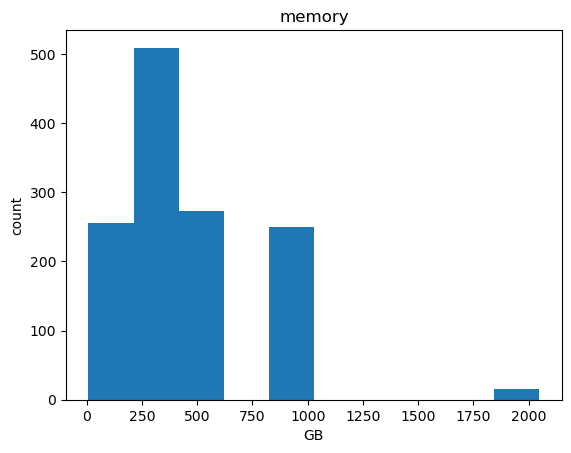

In [159]:
plt.hist(df['Memory_Amount'])
plt.title('memory') # наименование
plt.xlabel('GB')
plt.ylabel('count')


Text(0, 0.5, 'count')

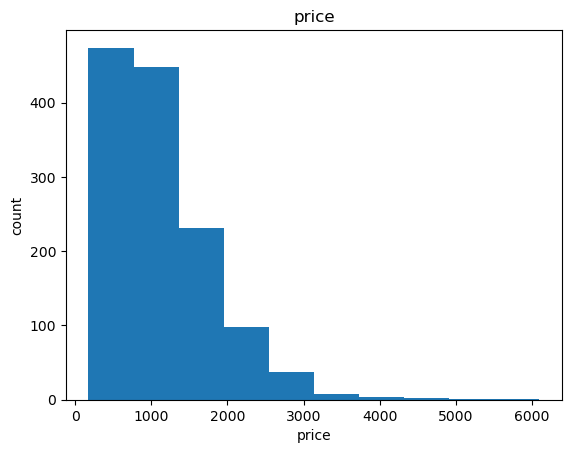

In [160]:
plt.hist(df['Price_euros'])
plt.title('price') # наименование
plt.xlabel('price')
plt.ylabel('count')

Text(0, 0.5, 'count')

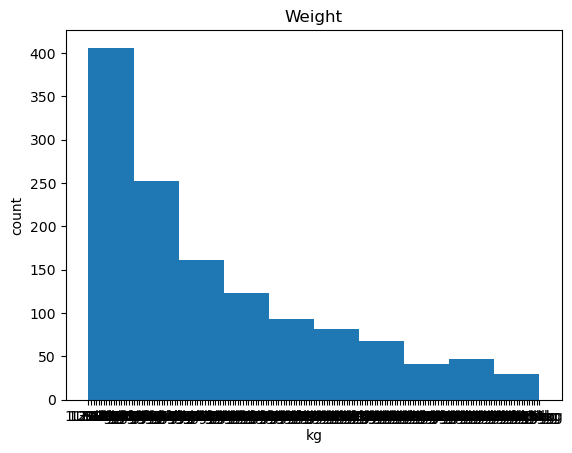

In [161]:
plt.hist(df['Weight'])
plt.title('Weight') 
plt.xlabel('kg')
plt.ylabel('count')

***задание 2***  
2.1 изучите распределение типов носителей (Memory_Type)  
2.2 изучите распределение компаний (Company)  
2.1 изучите распределение операционных систем (OpSys)  
2.1 изучите распределение компаний производителей (Cpu_Company)  
постройте график, сделайте выводы

In [162]:
date = df['Memory_Type'].value_counts()
date

['SSD']                                    637
['HDD']                                    374
['SSD', '+', '1TB', 'HDD']                 183
['Flash', 'Storage']                        74
['SSD', '+', '2TB', 'HDD']                  15
['Hybrid']                                  10
['SSD', '+', '256GB', 'SSD']                 3
['SSD', '+', '500GB', 'HDD']                 2
['SSD', '+', '1.0TB', 'Hybrid']              2
['SSD', '+', '512GB', 'SSD']                 1
['Flash', 'Storage', '+', '1TB', 'HDD']      1
['HDD', '+', '1TB', 'HDD']                   1
Name: Memory_Type, dtype: int64

In [163]:
names = date.index
values = date.values

([<matplotlib.patches.Wedge at 0x5389a595e0>,
 [Text(0.03844831809961246, 1.0993278522967165, "['SSD']"),
  Text(-0.7408922332544137, -0.8130674625781601, "['HDD']"),
  Text(0.6247033135694023, -0.9053981279058453, "['SSD', '+', '1TB', 'HDD']"),
  Text(1.0343655791100992, -0.3742831131005369, "['Flash', 'Storage']"),
  Text(1.09034254953437, -0.14544113817930104, "['SSD', '+', '2TB', 'HDD']"),
  Text(1.0971237490701968, -0.07949515221795678, "['Hybrid']"),
  Text(1.0990761304339398, -0.0450739338238544, "['SSD', '+', '256GB', 'SSD']"),
  Text(1.0995396312573917, -0.031821365375470506, "['SSD', '+', '500GB', 'HDD']"),
  Text(1.0997953837273375, -0.021215888669546226, "['SSD', '+', '1.0TB', 'Hybrid']"),
  Text(1.0999200702493162, -0.013260432222960257, "['SSD', '+', '512GB', 'SSD']"),
  Text(1.0999712250609042, -0.007956383475794424, "['Flash', 'Storage', '+', '1TB', 'HDD']"),
  Text(1.099996802768921, -0.0026521497226579117, "['HDD', '+', '1TB', 'HDD']")],
 [Text(0.020971809872515887, 0

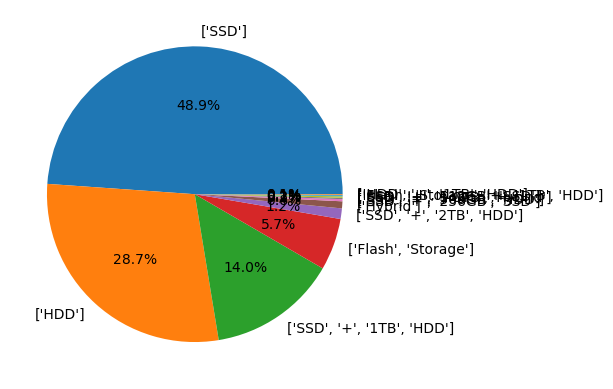

In [164]:
plt.pie(values, labels=names, autopct='%.1f%%')

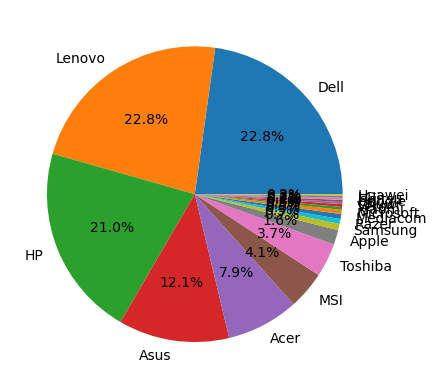

In [172]:
#2.2 вся запис в одну строку без разбивки
plt.pie(df['Company'].value_counts().values, labels=df['Company'].value_counts().index, autopct='%.1f%%');

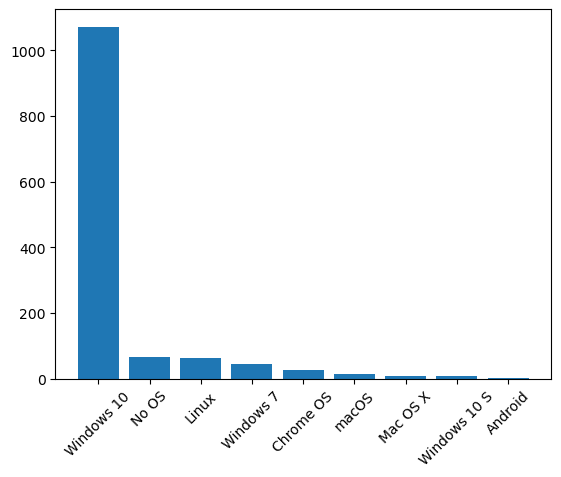

In [166]:
plt.bar(df['OpSys'].value_counts().index, height=df['OpSys'].value_counts().values); # если поставить ; то текста не будет
plt.xticks(rotation=45);

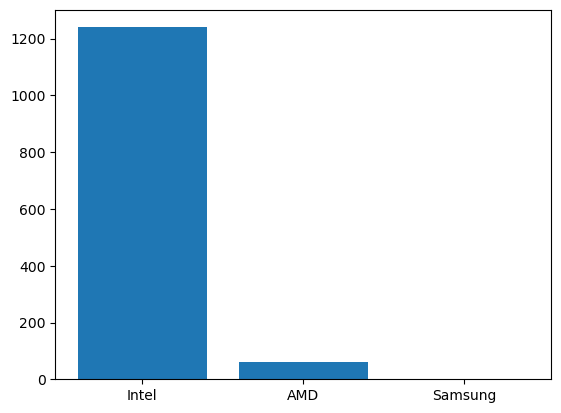

In [167]:
#2.1 изучите распределение компаний производителей (Cpu_Company)  
plt.bar(df['Cpu_company'].value_counts().index, height=df['Cpu_company'].value_counts().values); # если поставить ; то текста не будет

#тоже самое
# lines = df['Cpu_company'].value_counts().index
# colom = df['Cpu_company'].value_counts().values
# plt.bar(lines, height=colom);

***задание 3***  
изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессов, используя сложную или многорядовую столбчатую диаграмму  
процессоры от самсунг не изучать/сравнивать
3.1 постройте график в абсолютных величинах
3.2 постройте график в относительных величинах

''

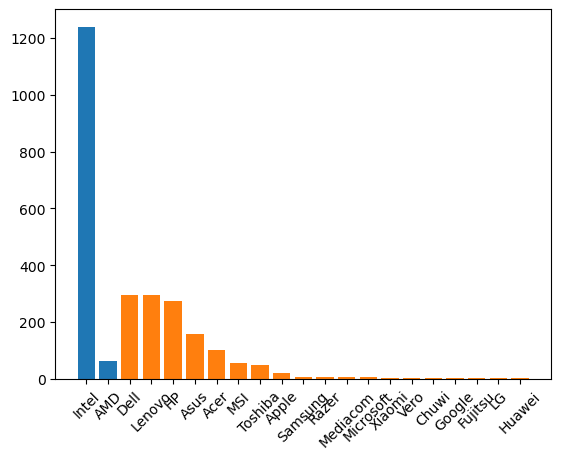

In [168]:
lines_1 = df[df['Cpu_company'] != 'Samsung']['Cpu_company'].value_counts().index
colom_1 = df[df['Cpu_company'] != 'Samsung']['Cpu_company'].value_counts().values
lines_2 = df[df['Cpu_company'] != 'Samsung']['Company'].value_counts().index
colom_2 = df[df['Cpu_company'] != 'Samsung']['Company'].value_counts().values
plt.bar(lines_1, height=colom_1)
plt.bar(lines_2, height=colom_2)
plt.xticks(rotation=45)
;

In [169]:
#второй вариант решения
da = pd.crosstab(index=df['Company'], columns=df['Cpu_company'], normalize='index')
da.reset_index()

Cpu_company,Company,AMD,Intel,Samsung
0,Acer,0.097087,0.902913,0.000000
1,Apple,0.000000,1.000000,0.000000
2,Asus,0.069620,0.930380,0.000000
3,Chuwi,0.000000,1.000000,0.000000
4,Dell,0.000000,1.000000,0.000000
5,Fujitsu,0.000000,1.000000,0.000000
6,Google,0.000000,1.000000,0.000000
7,HP,0.091241,0.908759,0.000000
8,Huawei,0.000000,1.000000,0.000000
9,LG,0.000000,1.000000,0.000000


In [170]:
import numpy as np

In [171]:
# !!ошибка на company, график не строится
da = pd.crosstab(index=df['Company'], columns=df['Cpu_company'], normalize='index')
plt.figure(figsize=(8, 6))
ticks = np.arange(len(da['AMD']))
x = 0.2
y = 0.4
plt.bar(da['Company'], da['AMD'])
plt.bar(da['Company'], da['Intel'], bottom=da['AMD'])
plt.legend(['AMD', 'Intel'])
plt.xticks(rotation=45)

KeyError: 'Company'

<Figure size 800x600 with 0 Axes>